<a href="https://colab.research.google.com/github/atharvad38/Atharva3_Projects/blob/main/EDA_on_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the titanic dataset file

In [11]:
train = pd.read_csv('titanic_train.csv')

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets check how many values are missing

In [13]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total 177 values from age and 687 values from cabin are missing majorly

<Axes: >

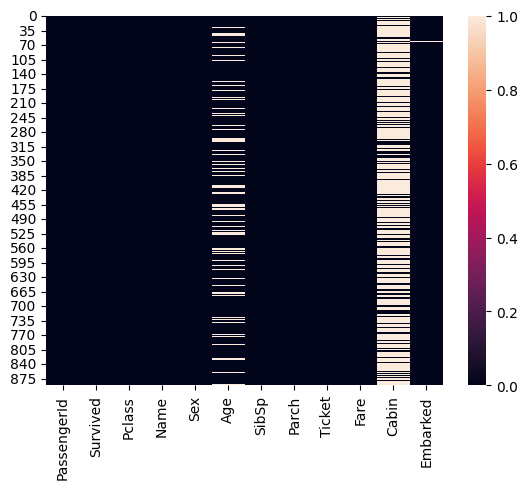

In [18]:
sns.heatmap(train.isnull())

Now lets make a countplot to see how many people have survived

<Axes: xlabel='Survived', ylabel='count'>

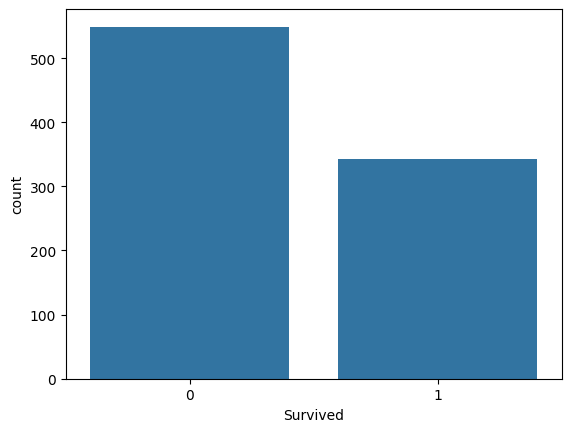

In [22]:
sns.countplot(x='Survived',data=train)

Now lets see out of how many survived , how many were men and women

<Axes: xlabel='Survived', ylabel='count'>

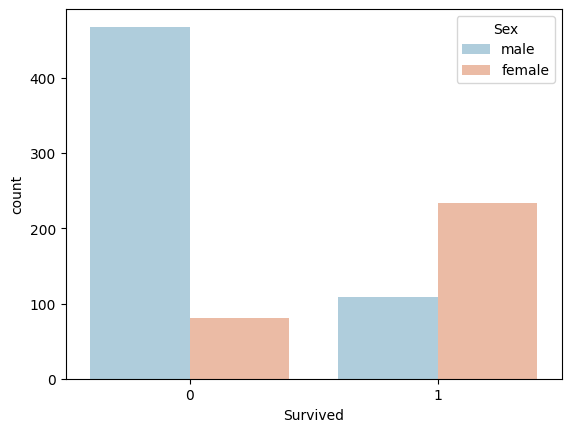

In [24]:
sns.countplot(x='Survived',hue='Sex',data=train,palette ='RdBu_r')

The graph above helps us understand that the majority of survivors were female, while the majority of those who lost their lives were male.

<Axes: xlabel='Survived', ylabel='count'>

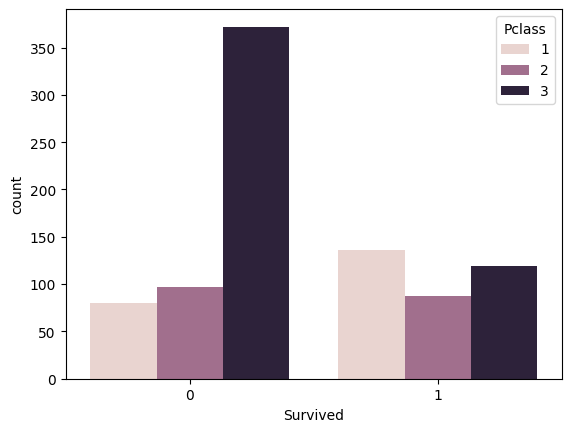

In [26]:
sns.countplot(x='Survived',hue='Pclass',data=train)

The graph above shows that the majority of survivors were from the first class, while the majority of those who lost their lives were from the third class.

<ipython-input-27-96d5b0357822>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False)


<Axes: xlabel='Age'>

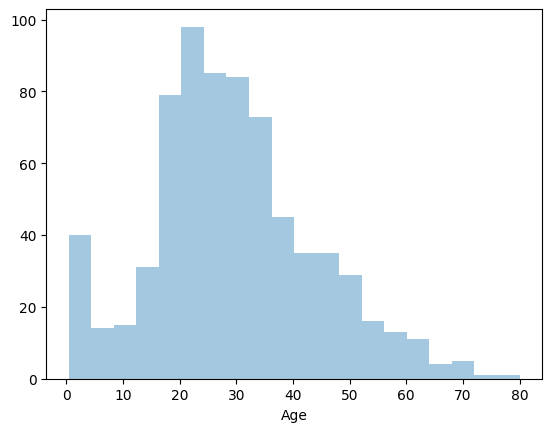

In [27]:
sns.distplot(train['Age'].dropna(),kde=False)

The distribution of age for passengers on the Titanic shows that the majority of passengers were between the ages of 20 and 40. There were also a significant number of passengers under the age of 20 and over the age of 40. The distribution is slightly skewed to the right, indicating that there were more passengers over the age of 40 than under the age of 20.

<Axes: >

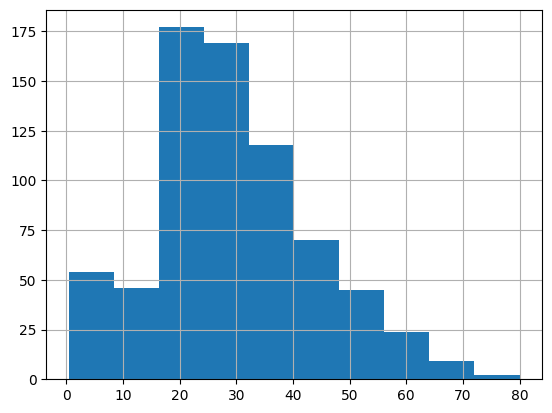

In [30]:
train['Age'].hist()

<Axes: xlabel='SibSp', ylabel='count'>

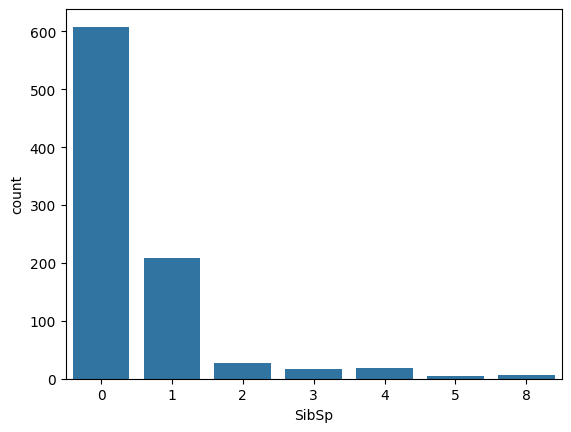

In [31]:
sns.countplot(x='SibSp',data=train)

# The graph above shows that the majority of passengers on the Titanic were traveling alone or with one other person. There were also a significant number of passengers traveling with two or three other people. The number of passengers traveling with four or more other people was relatively small.

# This information could be useful for understanding the social dynamics on the Titanic. For example, passengers who were traveling alone may have been more likely to be isolated and vulnerable, while passengers who were traveling with family or friends may have had more support.

<Axes: >

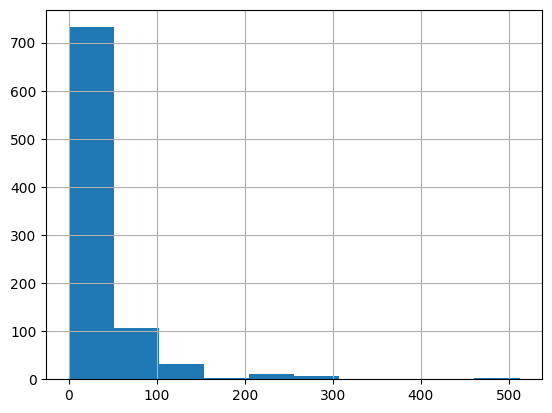

In [32]:
train['Fare'].hist()


 The distribution of fares paid by passengers on the Titanic shows that the majority of passengers paid between 0 and 50 pounds. There were also a significant number of passengers who paid between 50 and 100 pounds. The number of passengers who paid over 100 pounds was relatively small.

This information could be useful for understanding the economic status of passengers on the Titanic. For example, passengers who paid higher fares may have been more likely to be from wealthier families, while passengers who paid lower fares may have been more likely to be from poorer families.

#Data Cleaning

As we saw, many values in age column were missing, using Pclas , we will fill those missing values

<ipython-input-34-83ae0cce430d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

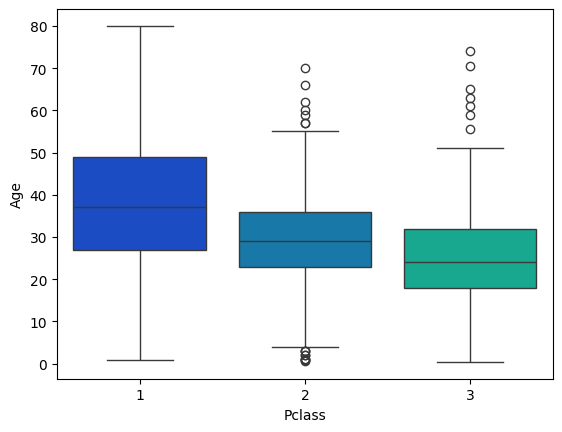

In [34]:
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

  Pclass 1 Avg age = 37

  Pclass 2 Avg age = 29
  
  Pclass 3 Avg age = 24


In [35]:
def impute(cols):
  age = cols[0]
  pclass = cols[1]
  if pd.isnull(age):
    if pclass == 1:
      return 37
    elif pclass == 2:
      return 29
    else:
      return 24
  else:
    return age

Now apply above function

In [36]:
train['Age'] = train[['Age','Pclass']].apply(impute,axis=1)

Now lets check the heatmap again

<Axes: >

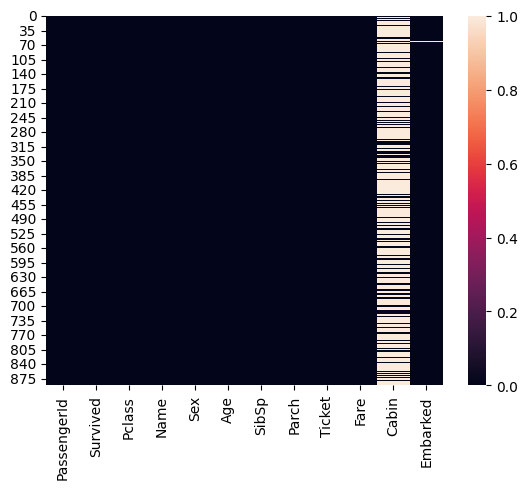

In [37]:
sns.heatmap(train.isnull())

deleting cabin column as it is of no use

In [38]:
train.drop('Cabin',axis=1,inplace=True)

<Axes: >

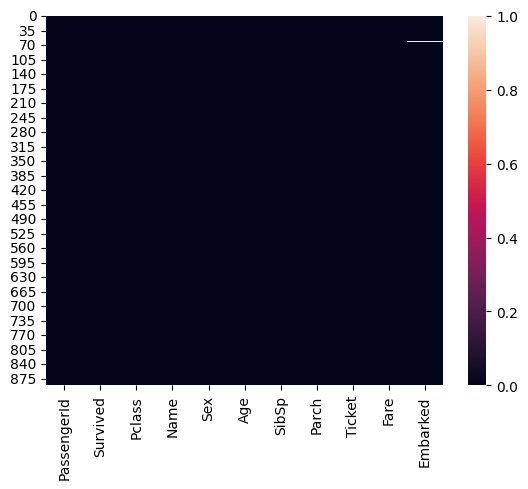

In [39]:
sns.heatmap(train.isnull())

  Now we will convert categorical features into some numerical values
  #`pd.get_dummies()` converts categorical variables into a form that can be provided to ML algorithms to do a better job in prediction, by converting categorical variable(s) into dummy/indicator variables.

In [41]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


"""Dropping the first category is done to avoid the dummy variable trap, which occurs when the variables are highly correlated, leading to multicollinearity. This can cause issues in regression models.

Example:
Consider a column Color with categories Red, Green, and Blue.

Without dropping a category:

Red is represented as [1, 0, 0]
Green is [0, 1, 0]
Blue is [0, 0, 1]
Using all three dummies, if you know the values of two dummies, you can infer the third. For instance, if Red=0 and Green=0, then it must be Blue=1. This perfect collinearity is problematic in regression models.

With dropping the first category:

Red is implied when both Green and Blue are 0
Green is [1, 0]
Blue is [0, 1]
Now, the absence of Green and Blue implicitly means Red. This setup avoids multicollinearity by removing redundant information."""

In [42]:
sex = pd.get_dummies(train['Sex'],drop_first = True)
embarked = pd.get_dummies(train['Embarked'],drop_first = True)

In [43]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [45]:
train = pd.concat([train,sex,embarked],axis=1)

In [46]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


<Axes: >

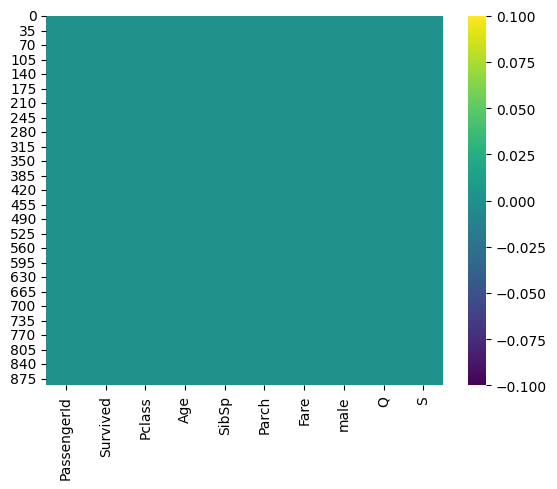

In [48]:
sns.heatmap(train.isnull(),cmap='viridis')

AS you can see from above graph, there are no null values

#Building a Logistic Regression model

Train test split

In [49]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [50]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

#Training and Predicting

In [53]:
from sklearn.linear_model import LogisticRegression

In [55]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
predictions = logmodel.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
accuracy = confusion_matrix(y_test,predictions)

In [59]:
accuracy

array([[133,  21],
       [ 42,  72]])

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.7649253731343284

In [62]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])